## Pathfinding

### Importing Packages

In [1]:
import numpy as np
import datashader as ds
from datashader.transfer_functions import shade
from datashader.transfer_functions import stack
from datashader.transfer_functions import dynspread
from datashader.transfer_functions import set_background
from datashader.colors import Elevation

import xrspatial

### A*

A* is an informed search algorithm, or a best-first search, meaning that it is formulated in terms of weighted graphs: starting from a specific starting node of a graph, it aims to find a path to the given goal node having the smallest cost (min distance travelled, shortest time, ...). 

The `xrspatial.a_star_search` function calculate the shortest path in pixel space from a start location to a goal location  through a given aggregate surface graph. The graph should be a line raster which contains crossable and non-crossable (a.k.a walls or barrieres) values. Note that both start and goal are in (lon, lat), or (x, y) coordinate space and must be within the graph. The `xrspatial.a_star_search` provides 2 separate options, `snap_start` and `snap_goal`, which can be set true to snap locations to the nearest valid value before beginning pathfinding. It also provides `connectivity` option to indicate neighborhood structure. This value can be set to either 4 or 8 that represents for 4-connectivity and 8-connectivity accordingly.

Let's generate some fake line raster and find shortest path with A*.

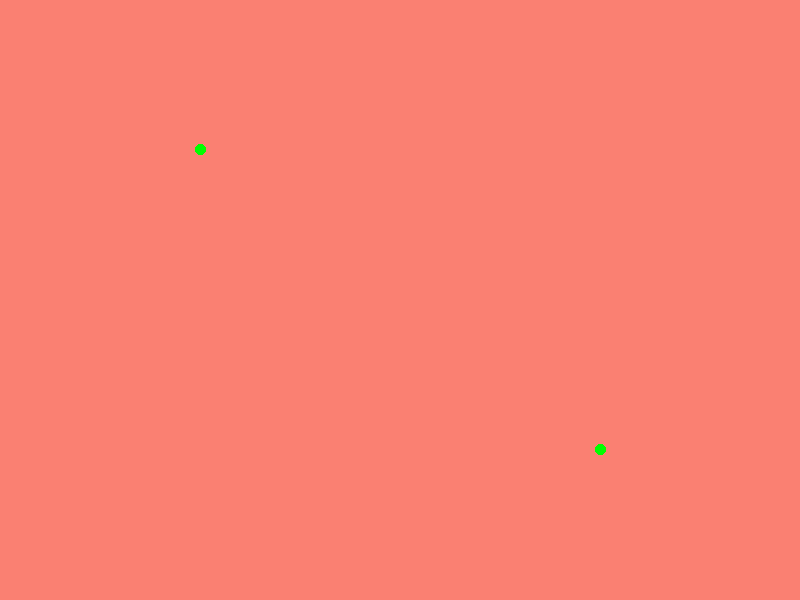

In [2]:
from xrspatial import a_star_search
import pandas as pd

# define range of x and y
xrange = (0, 4)
yrange = (0, 4)

# create line raster
ys = [1, 1, 3, 3, 1, 1, np.nan, 1, 3, np.nan, 1, 3, np.nan, 1, 3, np.nan, 2, 2]
xs = [1, 3, 3, 1, 1, 3, np.nan, 1, 3, np.nan, 3, 1, np.nan, 2, 2, np.nan, 1, 3]
line_df = pd.DataFrame(dict(x=xs, y=ys))

W = 800
H = 600
cvs = ds.Canvas(plot_width=W, plot_height=H,
                x_range=xrange, y_range=yrange)
line_agg = cvs.line(line_df, x='x', y='y').astype(int)
line_shaded = dynspread(shade(line_agg, cmap=['salmon']))

# pick up 2 random locations
start = (1, 3)
goal = (3, 1)

location_df = pd.DataFrame({'x': [start[0], goal[0]], 'y': [start[1], goal[1]]})
location_agg = cvs.points(location_df, 'x', 'y')
location_shaded = dynspread(shade(location_agg, cmap=['lime']), threshold=1, max_px=5)

set_background(stack(line_shaded, location_shaded), 'black')

#### 8-connectivity

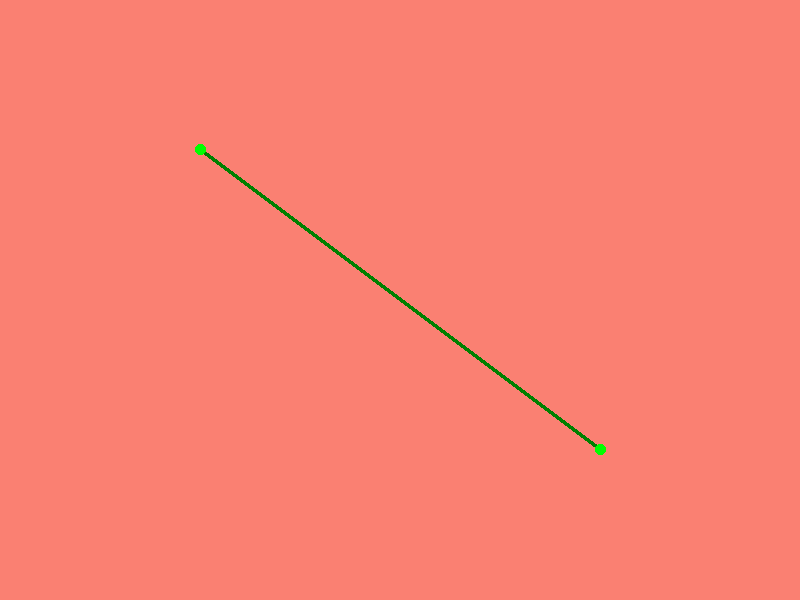

In [3]:
# find the path from start to goal, 
# barriers are uncrossable cells. In this case, they are cells with a value of 0

path_agg_8_connectivity = a_star_search(line_agg, start, goal, barriers=[0], snap_start=True, snap_goal=True)

path_shaded = dynspread(shade(path_agg_8_connectivity, cmap=['green']))
set_background(stack(line_shaded, path_shaded, location_shaded), 'black')

#### 4-connectivity

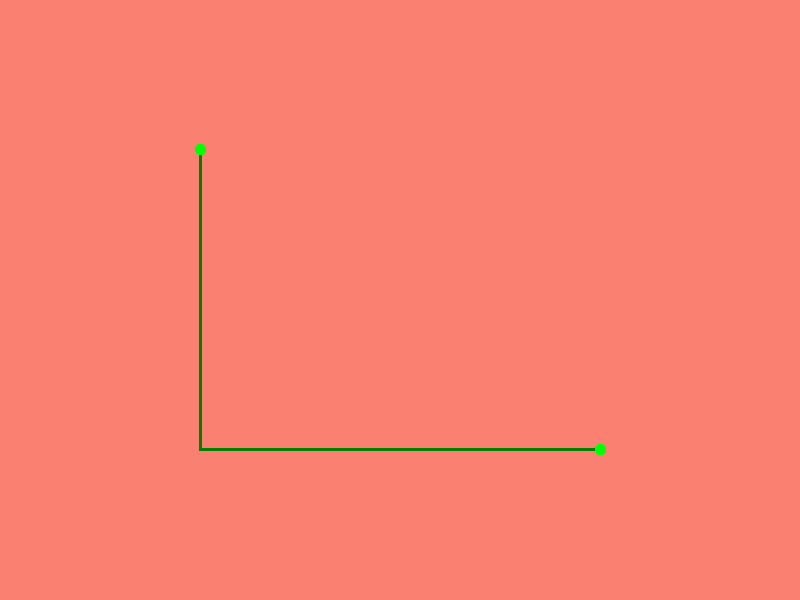

In [4]:
# find the path from start to goal, 
# barriers are uncrossable cells. In this case, they are cells with a value of 0

path_agg_4_connectivity = a_star_search(line_agg, start, goal, barriers=[0],
                                        snap_start=True, snap_goal=True, connectivity=4)

path_shaded = dynspread(shade(path_agg_4_connectivity, cmap=['green']))
set_background(stack(line_shaded, path_shaded, location_shaded), 'black')

### References

- A* search algorithm: https://en.wikipedia.org/wiki/A*_search_algorithm